In [1]:
import joblib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
path = 'advanced-regression/'

data = pd.read_csv(path+'train.csv')
print(data.shape)
data.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

## Data Split

When we engineer features, some techniques learn parameters from data
* It is important to learn these parameters only from train set, I am aplitting to avoid over-fitting

From training data by applying feature engineering techniques I try to find out:

* mean
* mode
* exponents for yeo-johnson transform
* category frequency
* category to number mappings


In [3]:
#performing train and test split (90:10)

X_train,X_test,y_train,y_test = train_test_split(data.drop(['Id','SalePrice'],axis=1),
                                                    data['SalePrice'],test_size=0.1,random_state=108)

X_train.shape,X_test.shape

((1314, 79), (146, 79))

# `Feature Engineering`
I will tackle:
1. **`Missing Values`**
2. **`Temporal Variables`**
3. **`Non-Gaussian distributed variables`**
4. **`Categorical variables: remove rare labels,convert strings to numbers `**
5. **`Scalling variables`**

In [4]:
#log transform on target
y_train = np.log(y_train)
y_test = np.log(y_test)

### 1. Missing Values

    1. Categorical Variables

    2. Numerical Variables

#### 1.1. Categorical Variables
I will replace missing values with string `missing` in those variables with a lot of missing data

* I will also replace missing data with most frequent category in those variables that contain fewer observations without values
    * This is common practice

In [5]:
#only categorical variables
cat_vars = [feature for feature in data.columns if data[feature].dtype =='O']
cat_vars = cat_vars + ['MSSubClass']

#casting all variables/features as categorical
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

#number of categorical variables
len(cat_vars)

44

In [6]:
#list of categorical variables containing missing values
cat_vars_with_na = [feature for feature in cat_vars if X_train[feature].isnull().sum() > 0]

#percentage of missing values per variable
X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

PoolQC          0.994673
MiscFeature     0.960426
Alley           0.936834
Fence           0.805175
FireplaceQu     0.471842
GarageType      0.057839
GarageFinish    0.057839
GarageQual      0.057839
GarageCond      0.057839
BsmtExposure    0.027397
BsmtFinType2    0.027397
BsmtQual        0.026636
BsmtCond        0.026636
BsmtFinType1    0.026636
MasVnrType      0.005327
Electrical      0.000761
dtype: float64

In [7]:
#variables/features to impute with string i.e. "Missing"
with_string_missing = [feature for feature in cat_vars_with_na if X_train[feature].isnull().mean() > 0.1]

#variables/features to impute with most frequent category
with_frequent_category = [feature for feature in cat_vars_with_na if X_train[feature].isnull().mean() < 0.1]

with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
# replace missing values with new label: "Missing"

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [9]:
for feature in with_frequent_category:
    #there can be more than 1 mode in a variable I am taking first one with [0]    
    mode = X_train[feature].mode()[0]
    print(feature,':', mode)
    X_train[feature].fillna(mode,inplace=True)
    X_test[feature].fillna(mode,inplace=True)

MasVnrType : None
BsmtQual : TA
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : Unf
BsmtFinType2 : Unf
Electrical : SBrkr
GarageType : Attchd
GarageFinish : Unf
GarageQual : TA
GarageCond : TA


In [10]:
#missing value recheck
X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [11]:
#if test set contain null values in engineered variables
[feature for feature in cat_vars_with_na if X_test[feature].isnull().sum() > 0]

[]

#### 1.2. Numerical Variables

To deal with missing values in numerical variables, I will:

* add a binary missing indicator variable and then 
* replace missing values in original variable with mean

In [12]:
#only numerical variables
num_vars = [feature for feature in X_train.columns if feature not in cat_vars and feature!='SalePrice']

#number of numerical variables
len(num_vars)

35

In [13]:
#list of numerical variables containing missing values
vars_with_na = [feature for feature in num_vars if X_train[feature].isnull().sum() > 0]

#print percentage of missing values per variable
X_train[vars_with_na].isnull().mean()

LotFrontage    0.175038
MasVnrArea     0.005327
GarageYrBlt    0.057839
dtype: float64

In [14]:
#replacing missing values
for feature in vars_with_na:
    #calculating mean using train dataset
    mean_val = X_train[feature].mean()
    print(feature,':', mean_val)

    #adding binary missing indicator (in train and test)
    X_train[feature + '_na'] = np.where(X_train[feature].isnull(),1,0)
    X_test[feature + '_na'] = np.where(X_test[feature].isnull(),1,0)

    #replacing missing values by mean(in train and test)
    X_train[feature].fillna(mean_val,inplace=True)
    X_test[feature].fillna(mean_val,inplace=True)

#check if no more missing values
X_train[vars_with_na].isnull().sum()

LotFrontage : 70.36715867158672
MasVnrArea : 104.36648814078042
GarageYrBlt : 1978.2495961227787


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [15]:
#check that test set does not contain null values in the engineered variables
[feature for feature in vars_with_na if X_test[feature].isnull().sum() > 0]

[]

In [16]:
#checking binary missing indicator variables
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].tail(10)

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
565,0,0,0
1330,0,0,0
116,1,0,0
594,0,0,0
854,0,0,0
1390,0,0,0
459,1,0,0
145,0,0,0
791,1,0,0
99,0,0,1


### 2. Temporal variables

#### Capturing elapsed time

Data have 4 variables that refer to years in which house or garage were built or remodeled

* I will capture time elapsed between those variables and year in which house was sold

In [17]:
def elapsed_years(df,var):
    # capture difference between year variable and year in which house was sold
    df[var] = df['YrSold'] - df[var]
    return df

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    X_train = elapsed_years(X_train,feature)
    X_test = elapsed_years(X_test,feature)

In [18]:
#dropping YrSold
X_train.drop(['YrSold'],axis=1,inplace=True)
X_test.drop(['YrSold'],axis=1,inplace=True)

### 3. Numerical Variable Transformation

#### 3.1. Logarithmic Transformation
From previous observations, numerical variables are not normally distributed

I will transform with Logarightm, positive numerical variables in order to get a more Gaussian-like distribution

In [19]:
for feature in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    X_train[feature] = np.log(X_train[feature])
    X_test[feature] = np.log(X_test[feature])

In [20]:
#checking if test/train set does not contain null values in engineered variables
print([feature for feature in ["LotFrontage","1stFlrSF","GrLivArea"] if X_test[feature].isnull().sum() > 0])

#on train set
print([feature for feature in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[feature].isnull().sum() > 0])

[]
[]


#### 3.2. Yeo-Johnson transformation
Applying Yeo-Johnson transformation to LotArea

In [21]:
#yeo-johnson transformation learns best exponent to transform variable it needs to learn it from train set
X_train['LotArea'],param = stats.yeojohnson(X_train['LotArea'])

#now applying transformation to test set with same parameter: 
## see who this time we pass param as argument to the yeo-johnson
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'],lmbda=param)
print(param)

-12.55283001172003


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [22]:
#checking absence of na in train/test set

print([feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0])
print([feature for feature in X_train.columns if X_test[feature].isnull().sum() > 0])

[]
[]


#### 3.3. Binarize skewed variables
There were a few variables very skewed, let's transform those into binary variables

In [23]:
skewed = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

for feature in skewed:
    #mapping variable values into 0 and 1
    X_train[feature] = np.where(X_train[feature]==0,0,1)
    X_test[feature] = np.where(X_test[feature]==0,0,1)

### 4. Categorical variables
Applying  mappings
* These are variables which values have an assigned order, related to quality

In [24]:
# re-map strings to numbers, which determine quality
qual_vars = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
             'KitchenQual','FireplaceQu','GarageQual','GarageCond']

qual_mappings = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 
                 'Ex':5, 'Missing':0, 'NA':0
                }

for feature in qual_vars:
    X_train[feature] = X_train[feature].map(qual_mappings)
    X_test[feature] = X_test[feature].map(qual_mappings)

In [25]:
feature = 'BsmtExposure'
exposure_mappings = {'No':1, 'Mn':2, 'Av':3, 'Gd':4}

X_train[feature] = X_train[feature].map(exposure_mappings)
X_test[feature] = X_test[feature].map(exposure_mappings)

In [26]:
finish_vars = ['BsmtFinType1','BsmtFinType2']
finish_mappings = {'Missing':0, 'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

for feature in finish_vars:
    X_train[feature] = X_train[feature].map(finish_mappings)
    X_test[feature] = X_test[feature].map(finish_mappings)

In [27]:
feature = 'GarageFinish'
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

X_train[feature] = X_train[feature].map(garage_mappings)
X_test[feature] = X_test[feature].map(garage_mappings)

In [28]:
feature = 'Fence'
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

X_train[feature] = X_train[feature].map(fence_mappings)
X_test[feature] = X_test[feature].map(fence_mappings)

In [29]:
#checking absence of nan in train set
[feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0]

[]

#### 4.1. Removing Rare Labels
For remaining categorical variables, I will group those categories that are present in less than 1% of observations, That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by string "Rare"

In [30]:
#capturing all quality variables
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capturing remaining categorical variables (those that I did not re-map)
cat_others = [feature for feature in cat_vars if feature not in qual_vars]
len(cat_others)

30

In [31]:
def find_frequent_labels(df,var,rare_perc):
    """
    function finds labels that are shared by more than
    a certain % of houses in dataset
    """
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index


for feature in cat_others:
    #finding frequent categories
    frequent_ls = find_frequent_labels(X_train,feature,0.01)
    print(feature ,"\n==>", frequent_ls)
    print()
    
    #replacing rare categories by string "Rare"
    X_train[feature] = np.where(X_train[feature].isin(frequent_ls), X_train[feature], 'Rare')
    X_test[feature] = np.where(X_test[feature].isin(frequent_ls), X_test[feature], 'Rare')

MSZoning 
==> Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street 
==> Index(['Pave'], dtype='object', name='Street')

Alley 
==> Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape 
==> Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour 
==> Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities 
==> Index(['AllPub'], dtype='object', name='Utilities')

LotConfig 
==> Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope 
==> Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood 
==> Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 
==> Index(['Artery', 'Feedr', 'Norm', 'PosN'

#### 4.2. Encoding of Categorical Variables
Let's transform strings of categorical variables into numbers

I will do it so that we capture monotonic relationship between label and target

In [32]:
X_test['Utilities'].unique()

array(['AllPub', 'Rare'], dtype=object)

In [33]:
# this function will assign discrete values to strings of variables,
# so that smaller value corresponds to category that shows smaller
# mean house sale price

def replace_categories(train,test,y_train,var,target):  
    tmp = pd.concat([X_train,y_train], axis=1)
    
    # order categories in a variable from that with lowest
    # house sale price, to that with highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels,0)}
    print(var,"\n==>",ordinal_label)
    print()

    # use dictionary to replace categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [34]:
for feature in cat_others:
    replace_categories(X_train,X_test,y_train,feature,'SalePrice')

MSZoning 
==> {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street 
==> {'Rare': 0, 'Pave': 1}

Alley 
==> {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape 
==> {'Reg': 0, 'Rare': 1, 'IR1': 2, 'IR2': 3}

LandContour 
==> {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities 
==> {'AllPub': 0}

LotConfig 
==> {'Inside': 0, 'Corner': 1, 'FR2': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope 
==> {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood 
==> {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'BrkSide': 3, 'OldTown': 4, 'Edwards': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'Rare': 10, 'SawyerW': 11, 'NWAmes': 12, 'Gilbert': 13, 'CollgCr': 14, 'Blmngtn': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 
==> {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 
==> {'Rare': 0, 'Norm': 1}

BldgType 
==> {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle 
==> {'SFoyer': 0, '1

In [35]:
# check absence of na in train/test set
print([feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0])
print([feature for feature in X_test.columns if X_test[feature].isnull().sum() > 0])

[]
['Utilities']


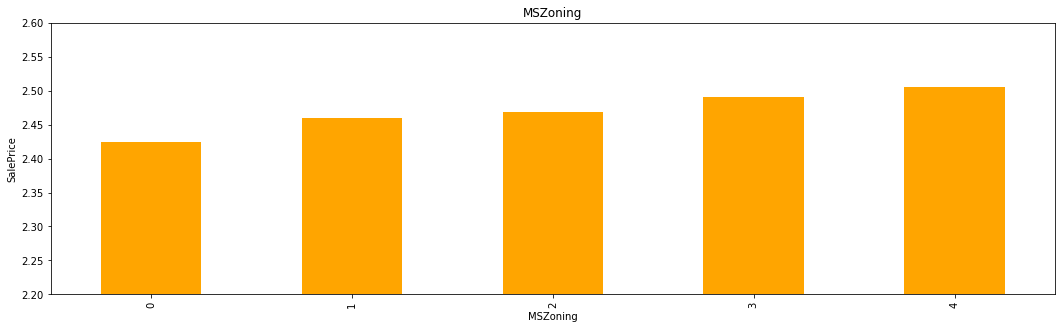

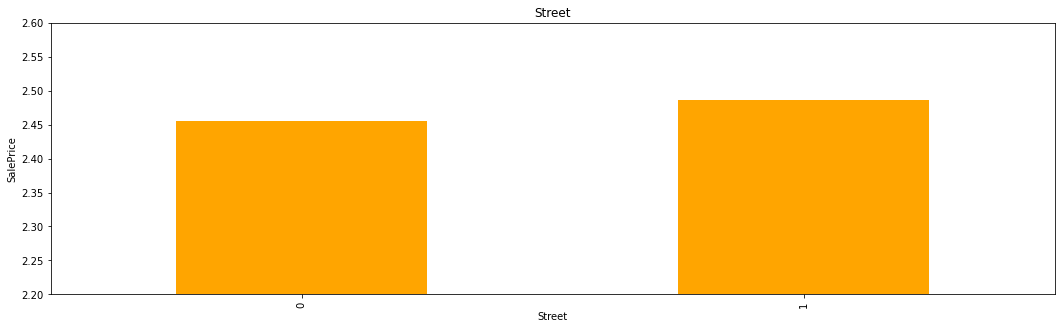

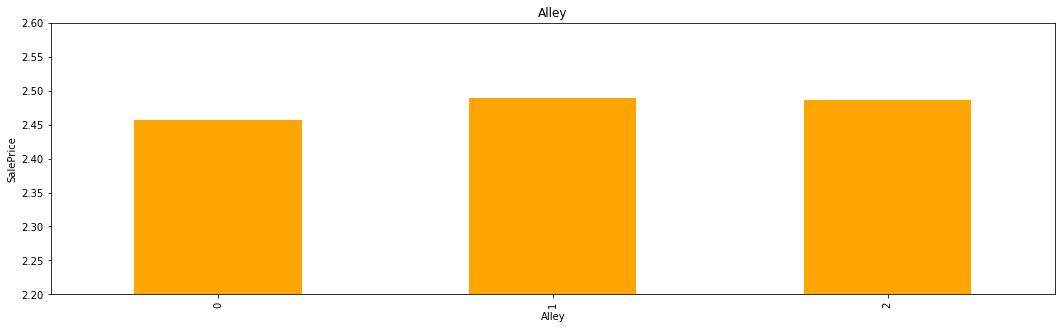

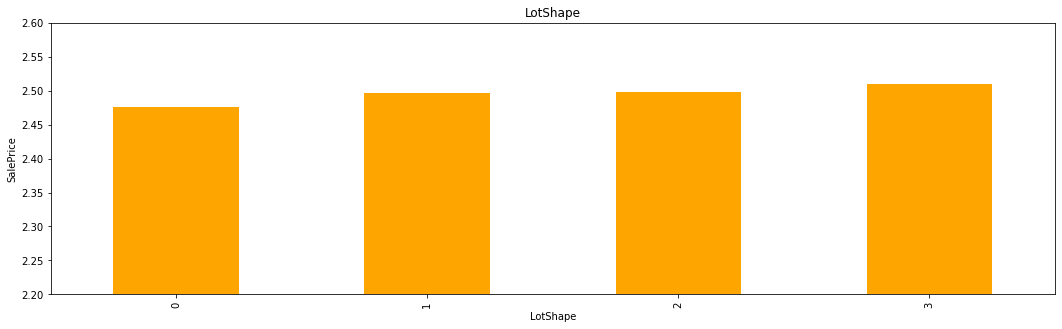

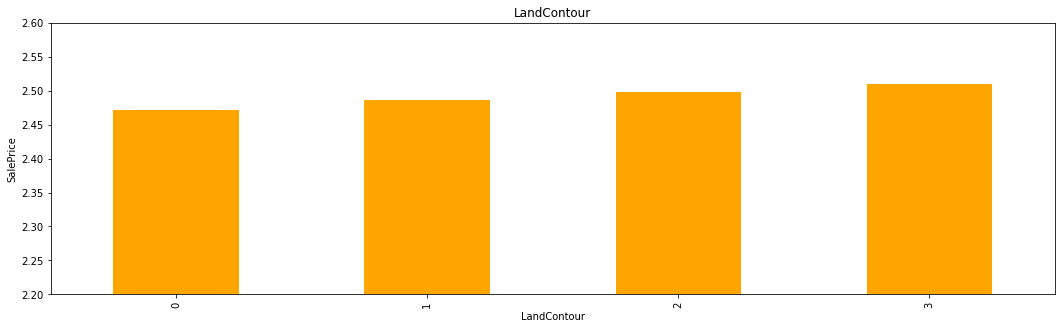

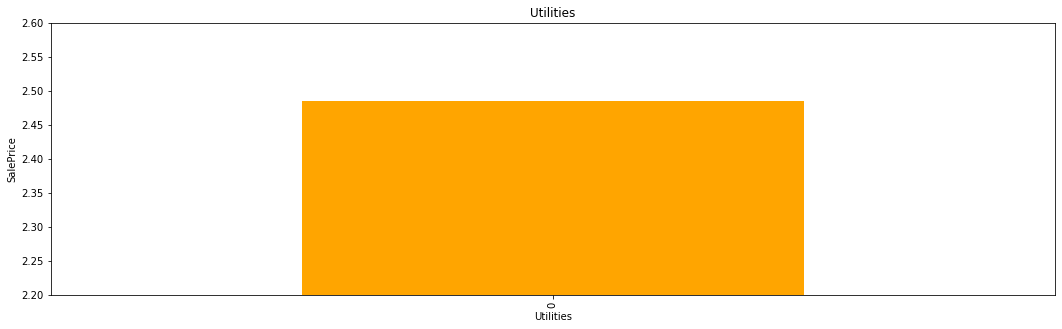

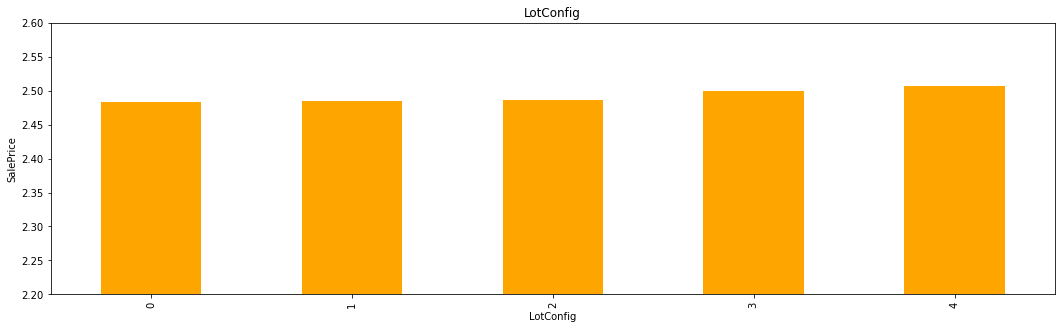

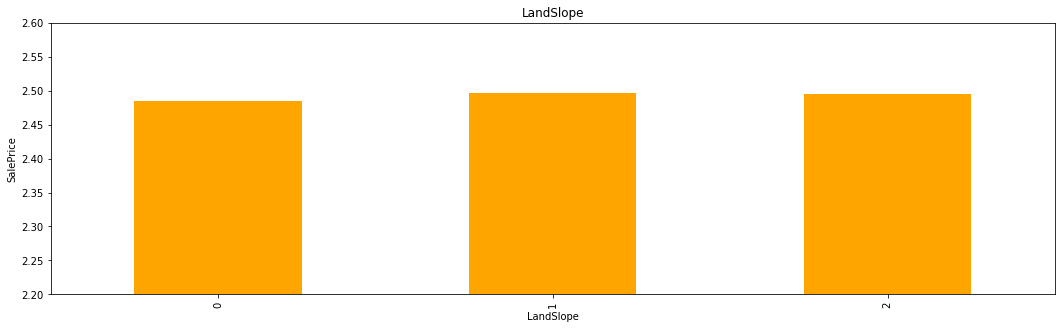

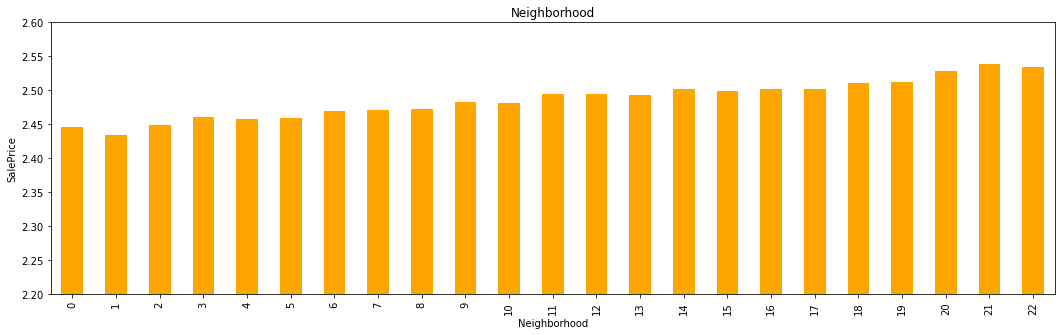

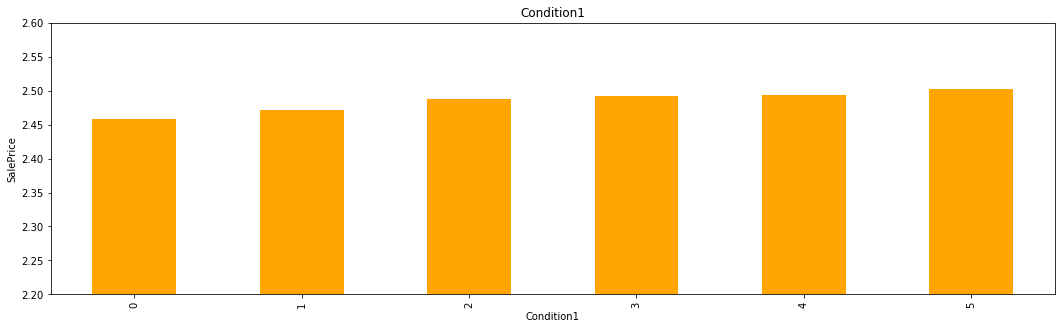

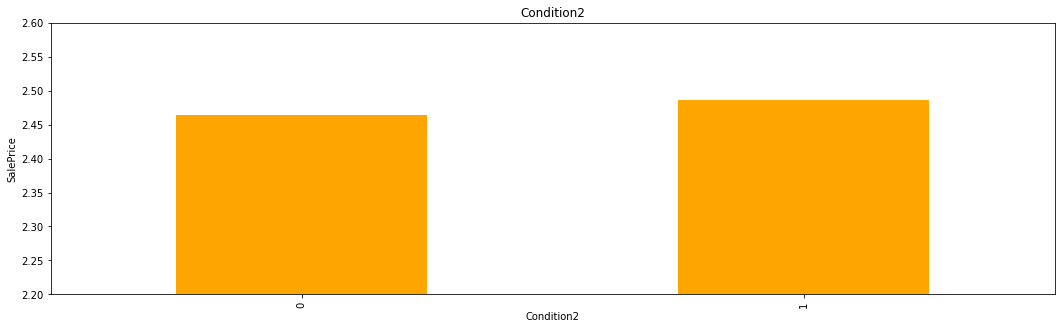

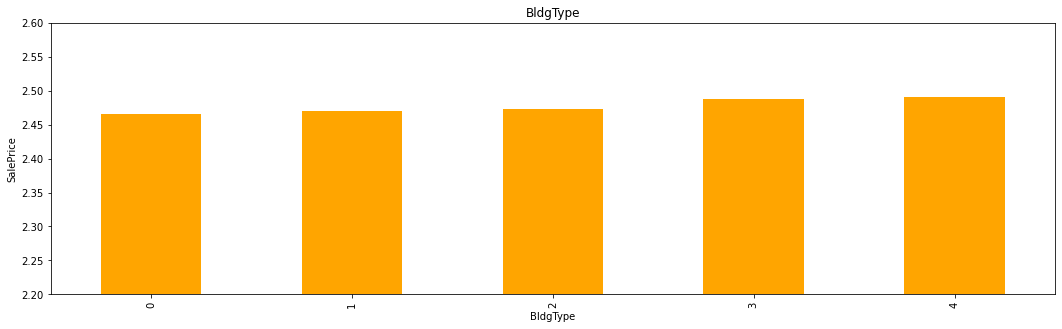

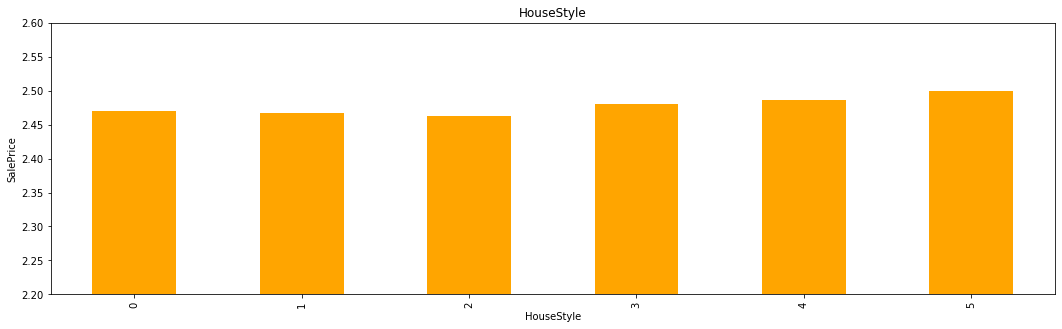

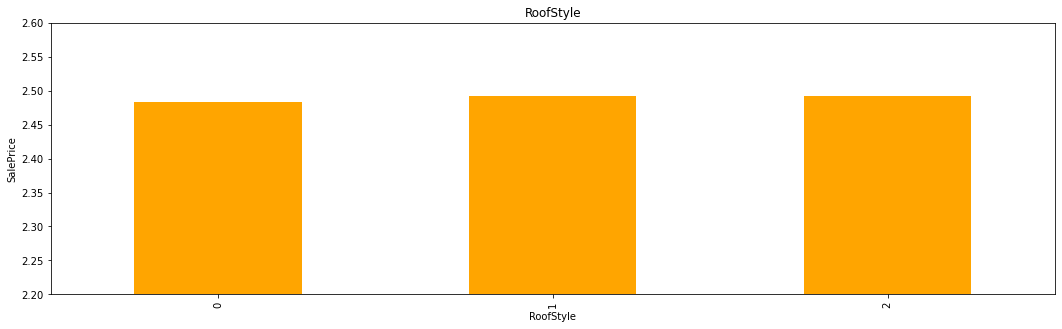

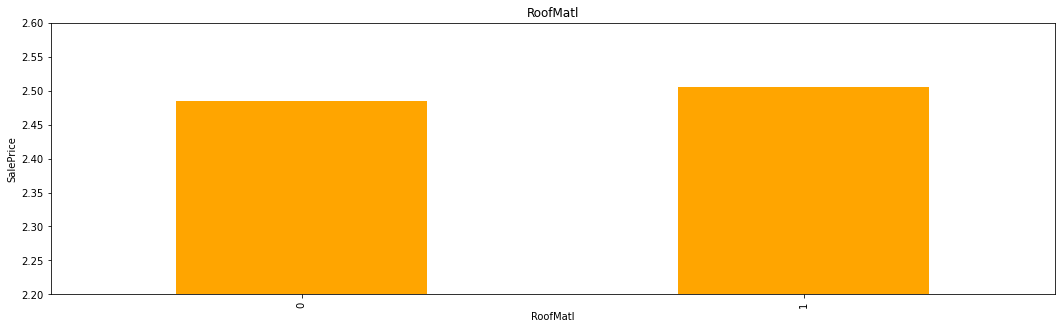

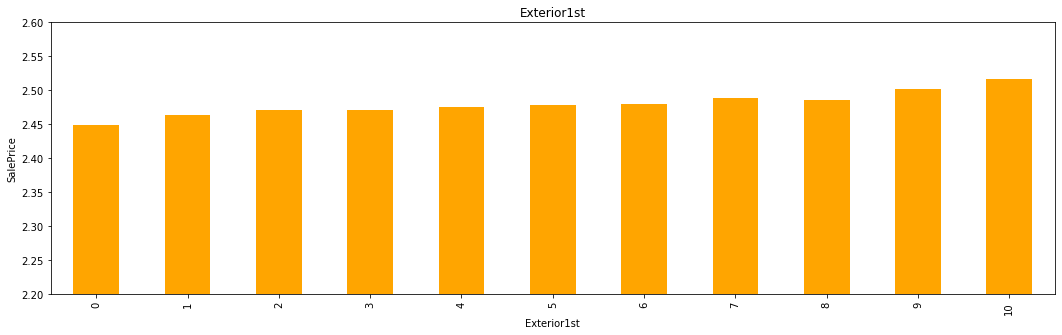

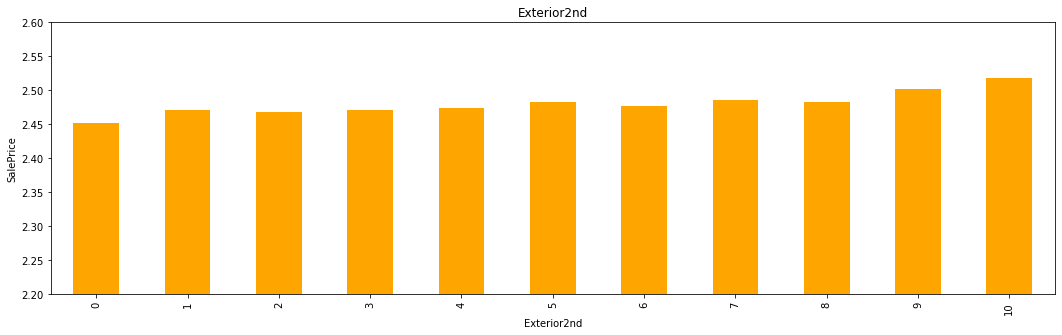

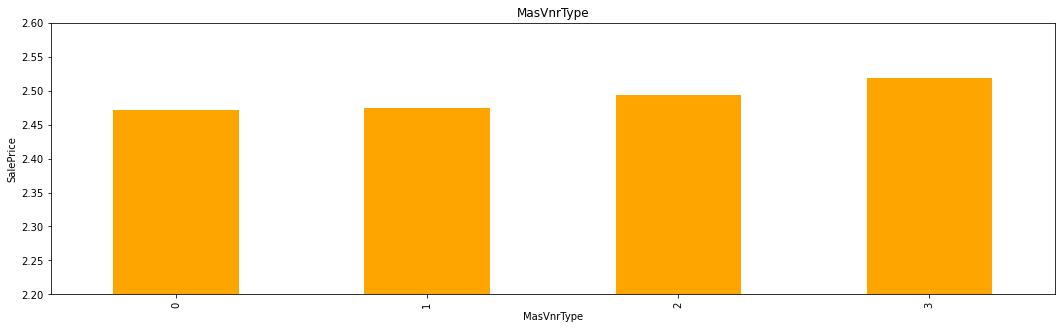

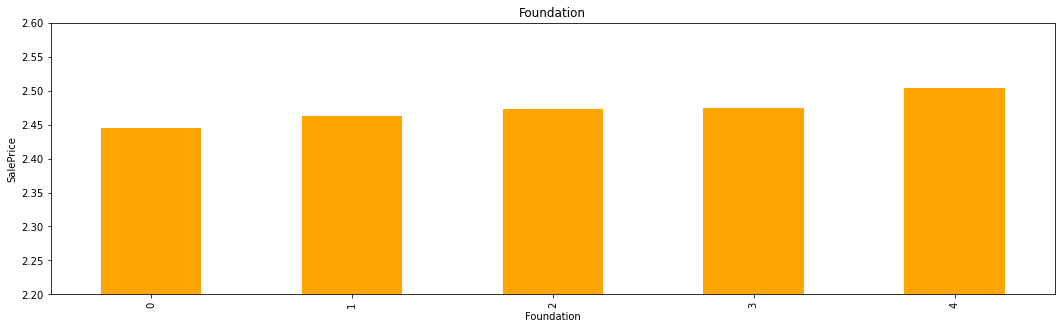

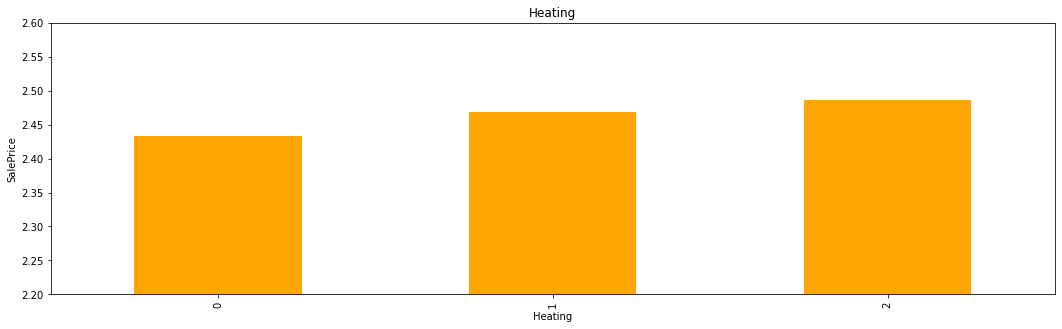

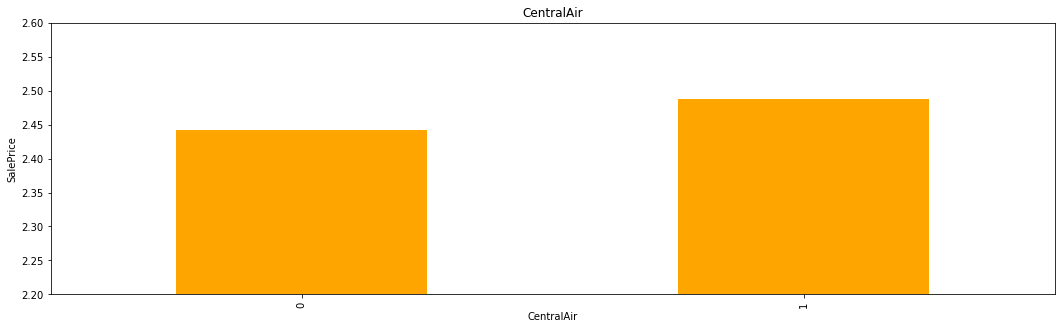

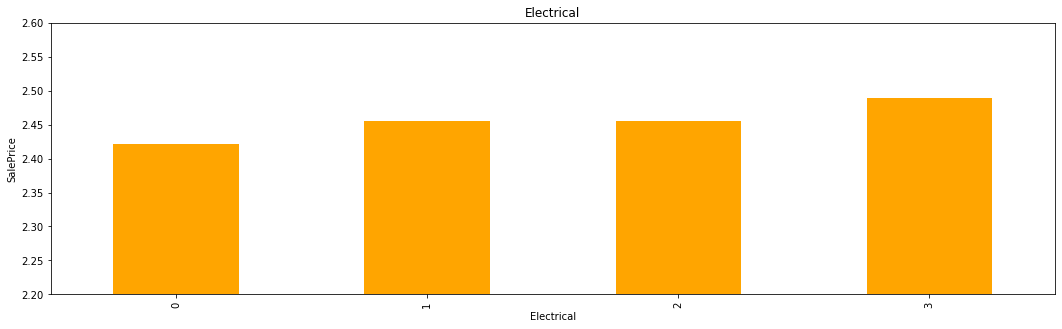

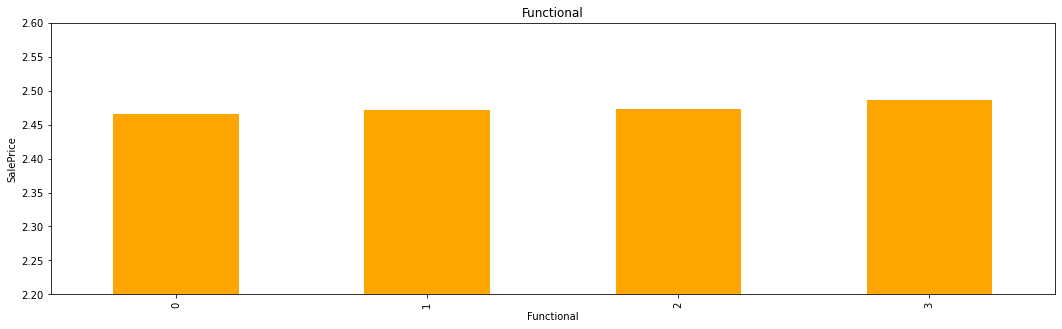

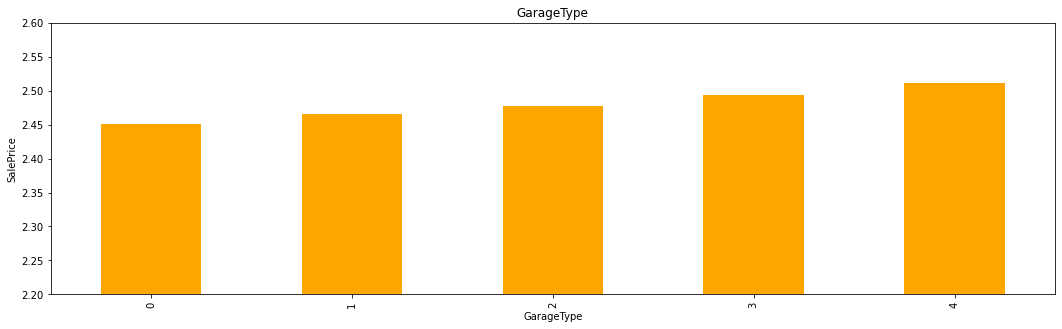

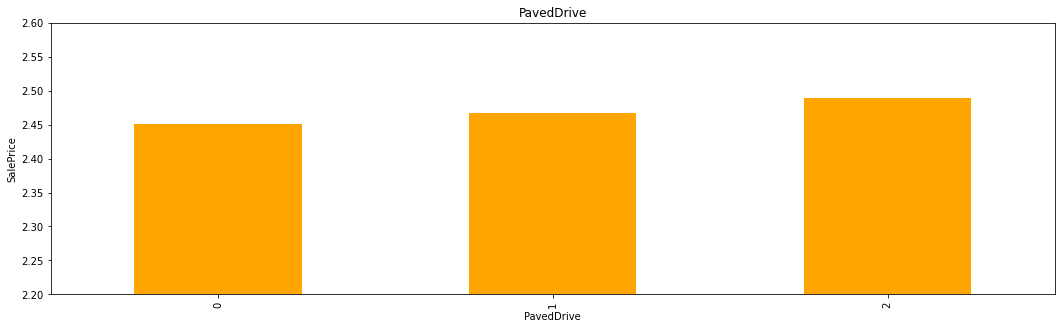

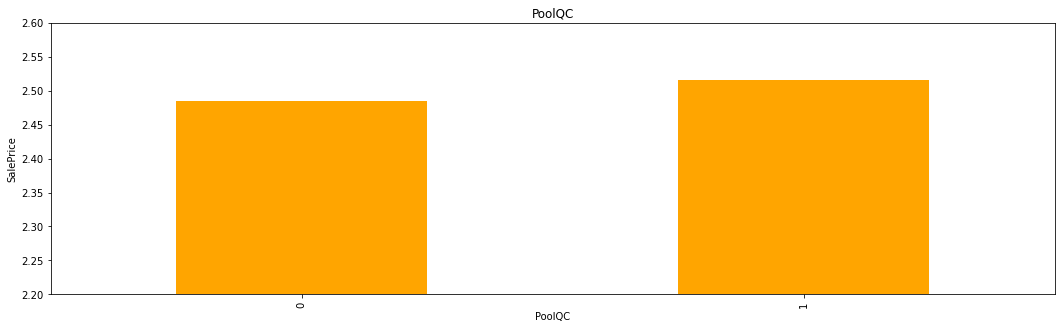

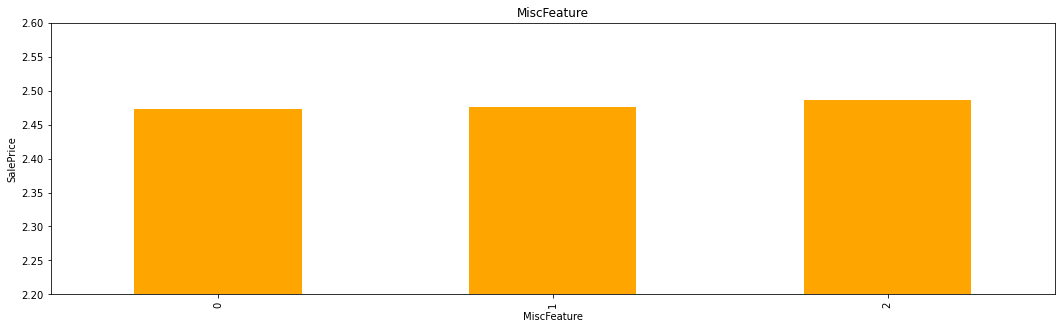

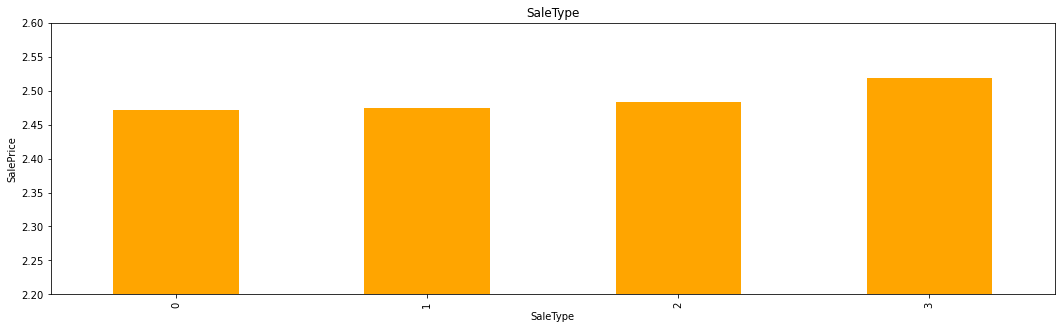

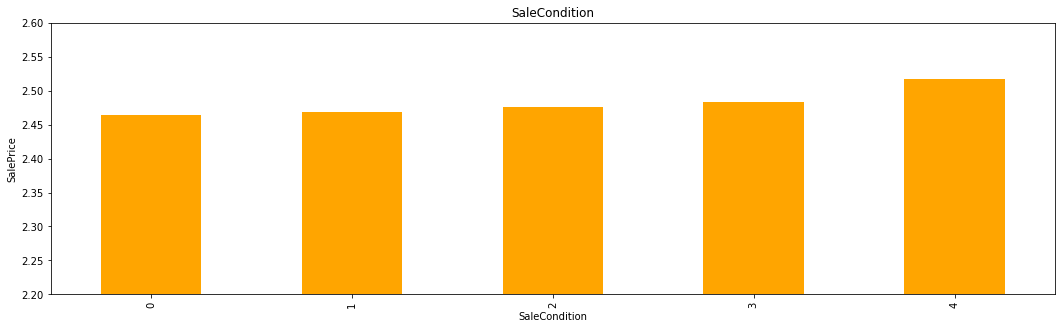

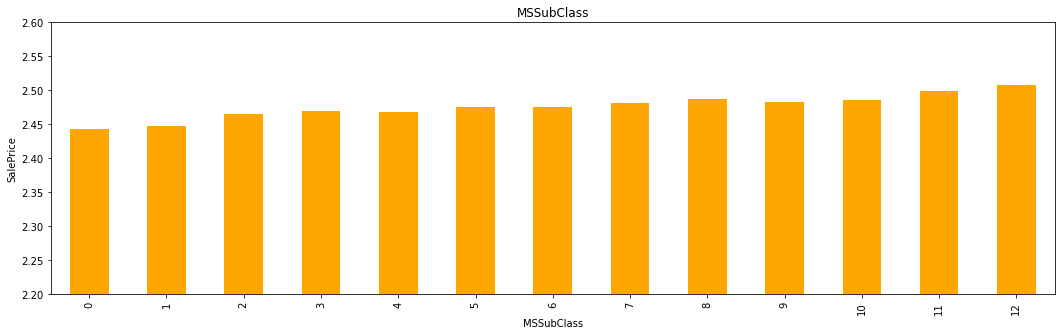

In [37]:
#lets me show you what I mean by monotonic relationship between labels and target

def analyse_vars(train, y_train, var):
    # function plots median house sale price per encoded category
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    tmp.groupby(var)['SalePrice'].median().plot.bar(color="orange",figsize=(18,5))
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for feature in cat_others:
    analyse_vars(X_train,y_train,feature)

**`Observation:`**

Monotonic relationship is particularly clear for variables `MSZoning` and `Neighborhood`
* Note how higher integer that now represents category, higher the mean house sale price

(remember that target is log-transformed, that is why differences seem so small)

### 5. Feature Scaling
For use in linear models, features need to be either scaled

I will scale features to minimum and maximum values

In [38]:
# create scaler
scaler = MinMaxScaler()
# fit scaler to train set
scaler.fit(X_train) 

# transform train and test set
#wrap array with a pandas dataframe
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [39]:
X_train.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1304,0.583333,0.75,0.423859,0.0,1.0,1.0,0.000000,0.000000,0.0,0.25,0.0,0.318182,0.4,1.0,0.75,1.0,0.555556,0.375,0.698529,1.000000,0.0,0.0,0.2,0.1,0.333333,0.000000,0.333333,0.5,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.345034,0.131915,1.0,0.50,0.0,0.333333,0.349465,0.390315,0.0,0.564433,0.333333,0.0,0.333333,0.5,0.500,0.333333,0.000000,0.333333,1.0,0.000000,0.0,0.25,0.841121,0.0,0.25,0.152327,0.5,0.5,1.0,0.000000,0.120658,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.363636,0.666667,0.75,0.0,0.0,0.0
1305,0.750000,0.75,0.517503,0.0,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.818182,0.4,1.0,0.75,0.6,0.777778,0.500,0.007353,0.032787,1.0,0.0,0.9,0.9,1.000000,0.256250,0.666667,0.5,1.0,0.666667,1.000000,0.666667,0.0,0.000000,0.0,0.0,0.679795,0.259902,1.0,1.00,1.0,1.000000,0.590012,0.000000,0.0,0.551528,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.75,0.009346,0.5,0.75,0.581805,0.5,0.5,1.0,0.195652,0.082267,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,1.000000,0.666667,0.75,0.0,0.0,0.0
1306,0.750000,0.75,0.447575,0.0,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.272727,0.4,1.0,0.75,0.6,0.444444,0.500,0.345588,0.786885,0.0,0.0,0.2,0.1,0.666667,0.072500,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.2,0.030120,0.6,1.0,0.107877,0.178723,1.0,0.50,1.0,1.000000,0.448302,0.000000,0.0,0.419061,0.000000,0.5,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.2,0.75,0.439252,0.0,0.25,0.203103,0.5,0.5,1.0,0.000000,0.036563,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,1.0,0.0,0.0
1307,0.750000,0.75,0.530342,0.0,1.0,1.0,0.666667,0.333333,0.0,0.00,0.0,0.636364,0.4,1.0,0.75,0.6,0.444444,0.625,0.242647,0.557377,1.0,0.0,0.5,0.5,0.333333,0.000000,0.333333,0.5,0.5,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.395548,0.151227,1.0,0.50,1.0,1.000000,0.385083,0.000000,0.0,0.359966,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.252336,0.0,0.25,0.197461,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
1308,0.750000,0.75,0.584988,0.0,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.272727,0.4,1.0,0.75,0.6,0.444444,0.375,0.375000,0.540984,1.0,0.0,0.2,0.7,0.333333,0.000000,0.333333,0.5,0.5,0.333333,0.666667,0.333333,0.8,0.054217,0.4,1.0,0.159247,0.288543,1.0,0.50,1.0,1.000000,0.632992,0.000000,0.0,0.591706,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.8,0.75,0.476636,0.0,0.50,0.320169,0.5,0.5,1.0,0.000000,0.764168,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.25,0.0,0.0,0.0
1309,0.750000,0.75,0.445638,0.0,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.636364,0.4,1.0,0.75,0.6,0.666667,0.500,0.044118,0.114754,0.0,0.0,0.9,0.9,0.666667,0.152500,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.248051,0.0,0.0,0.053510,0.249591,1.0,1.00,1.0,1.000000,0.574692,0.000000,0.0,0.537208,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.056075,0.5,0.50,0.381523,0.5,0.5,1.0,0.297554,0.065814,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,0.0
1310,0.333333,0.75,0.447575,0.0,1.0,1.0,0.666667,0.000000,0.0,0.25,0.0,0.136364,0.4,

In [40]:
#now saving train and test sets for next notebook

X_train.to_csv('xtrain.csv',index=False)
X_test.to_csv('xtest.csv',index=False)

y_train.to_csv('ytrain.csv',index=False)
y_test.to_csv('ytest.csv',index=False)

In [41]:
#let's save scaler

joblib.dump(scaler,'minmax_scaler.joblib')

['minmax_scaler.joblib']